<a href="https://colab.research.google.com/github/Falconwatch/digital_bh_kursk/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [77]:
train = pd.read_csv('train_dataset_train.csv')

# Посмотрим на тергеты

## Тематика

In [78]:
train["Тематика"].value_counts()

Нарушение дорожного покрытия (ямы)  на дорогах в границах городских округов и сельских поселений                 155
Неработающее наружное освещение                                                                                  108
Отсутствие люков на коммуникационных колодцах                                                                     90
Несанкционированные свалки твёрдых бытовых отходов                                                                85
Аварийные деревья                                                                                                 79
                                                                                                                ... 
Неудовлетворительный внешний вид (поведение) водителя при осуществлении муниципальных (пригородных) перевозок      1
Некачественное предоставление услуг почтовой связи                                                                 1
Неоформленные трудовые отношения                                

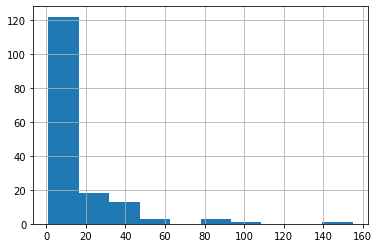

In [79]:
train["Тематика"].value_counts().hist()

## Категория

In [80]:
train["Категория"].value_counts()

3     954
0     478
16    149
8     139
4     108
10     48
7      27
1      25
11     19
5      12
13     11
6      10
15      7
9       5
14      4
2       3
12      1
Name: Категория, dtype: int64

## Ответственное лицо

In [81]:
train["Ответственное лицо"].value_counts()

Администрация города Курска                                          421
Комитет дорожного хозяйства города Курска                            215
Комитет жилищно-коммунального хозяйства города Курска                171
Государственная жилищная инспекция Курской области                   151
Комитет городского хозяйства города Курска                           127
                                                                    ... 
МКУ «Управление по делам ГО и ЧС при Администрации города Курска»      1
Комитет агропромышленного комплекса Курской области                    1
Комитет информации и печати Курской области                            1
Администрация Кореневского района                                      1
ООО `УК `Северный дом`                                                 1
Name: Ответственное лицо, Length: 75, dtype: int64

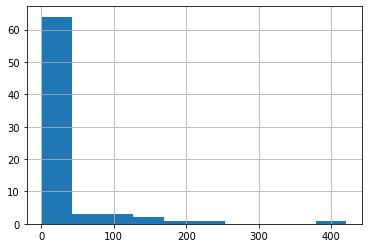

In [82]:
train["Ответственное лицо"].value_counts().hist()

## Связь тематики и категории

In [94]:
t = train.groupby(["Тематика", "Категория"])["id"].count().reset_index()
t['id'] = np.ones(t.shape[0])
cat_topic_links = t.pivot(columns = "Категория", index="Тематика", values="id").fillna(0)

In [102]:
t.to_excel("cat_topic.xlsx")

In [96]:
# каждая тема отнесена к одной из категорий
(cat_topic_links.sum(axis=1)>1).mean()

0.0

## Связь категории и ответственного лица

In [107]:
t2 = train.groupby(["Ответственное лицо", "Категория"])["id"].count().reset_index()
t2['id'] = np.ones(t2.shape[0])
cat_rel_links = t2.pivot(columns = "Категория", index="Ответственное лицо", values="id").fillna(0)

In [112]:
cat_rel_links.shape

(75, 17)

In [113]:
cat_rel_links.to_excel("cat_rel_links.xlsx")

In [114]:
cat_rel_links

Категория,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Ответственное лицо,,,,,,,,,,,,,,,,,
Администрация Беловского района,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Администрация Большесолдатского района,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Администрация Глушковского района,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Администрация Горшеченского района,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Администрация Железногорского района,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ООО `УК Сейм`,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ООО УК `Жилсервис-Центр`,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ответственный ПМИ,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# Посмотрим, какой мусор есть в сообщениях

In [97]:
train["Текст Сообщения"][5]

'<p>Добрый день! Управляющая Компания “Аврора +” не убирает дворовую территорию по адресу г. Курск, ул. Союзная д. 71Б. &nbsp;Я неоднократно звонил в управляющую компанию, но результата нет. &nbsp;После сегодняшнего снегопада ситуация также не изменилась. Прошу принять меры и обязать УК “Аврора +” &nbsp;исполнять свои обязательства, которые они в 2021 году взяли на себя, перед жителями многоквартирного дома. &nbsp;&nbsp;</p>'

In [98]:
train.iloc[4]

id                                                                 1797
Текст Сообщения       <p style=`text-align:justify;`><span style=`ba...
Тематика                                              Аварийные деревья
Ответственное лицо           Комитет городского хозяйства города Курска
Категория                                                             3
Name: 4, dtype: object

# Предобработка текстов

## Убираю HTML

In [99]:
import re
CLEANR = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
SPACER = re.compile('\s+')

def cleanhtml(raw_html):
  cleantext = re.sub(CLEANR, ' ', raw_html)
  cleantext = re.sub(SPACER, ' ', cleantext)
  return cleantext

In [100]:
train["text"] = train["Текст Сообщения"].apply(cleanhtml)

## Поиск адреса в сообщении

In [ ]:
# ToDo: научиться вытягивать адрес в отдельный столбец

## stemming

In [54]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("russian")

def stemtext(input_text):
  words = input_text.split(" ")
  return ' '.join([stemmer.stem(w) for w in words])

In [55]:
train.text = train.text.apply(stemtext)

## Lemmatisation

In [115]:
## ToDo

# Предскажем тематику по тексту

## TF-IDF

In [116]:
from sklearn.feature_extraction.text import TfidfVectorizer
td = TfidfVectorizer(max_features = 4500)
#X = td.fit_transform(X).toarray()

In [118]:
td = td.fit(train.text)

In [122]:
train_X = td.transform(train.text).toarray()

In [123]:
train_y = train['Категория']

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
clf = OneVsRestClassifier(LogisticRegression(solver='sag'))

In [129]:
clf_fitted = clf.fit(train_X, train_y)

In [131]:
train_predicted = clf_fitted.predict_proba(train_X)

In [132]:
from sklearn.metrics import roc_auc_score

In [134]:
roc_auc_score(y_true=train_y, y_score=train_predicted, multi_class='ovo')

0.9927395815037824